In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import nn_backprop as nnbp

In [5]:
IMG_DIM = 28
plt.rcParams['image.cmap'] = 'binary'
np.set_printoptions(precision=3)

To run this code, start at the top and press shift-enter in each cell. 

It is not recommended to select "run-all" since it will likely take a considerable amount of time.

## Homework Problem 5

### Part a) Basic Generalization

In [7]:
result1 = nnbp.train_singlelayer(epochs=10)

In [15]:
def plot_result(res):
    plt.plot(res['ce_test_per_epoch'], c='r')
    plt.plot(res['ce_train_per_epoch'], c='b')
    plt.title("Cross Entropy vs Epoch")
#plt.savefig('5a_crossentropy_vs_epoch.png')

In [17]:
results = [nnbp.train_singlelayer(epochs=200, seed=s) for s in range(5)]

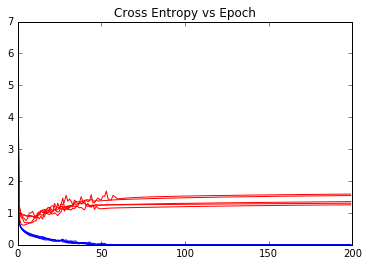

In [23]:
for res in results:
    plot_result(res)
plt.savefig('5a_crossentropy_vs_epoch_200.png')

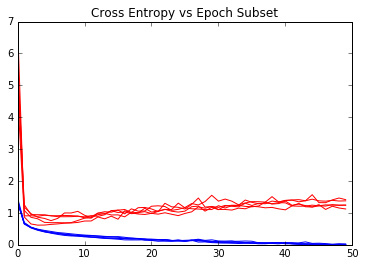

In [24]:
for res in results:
    plt.plot(res['ce_test_per_epoch'][:50], c='r')
    plt.plot(res['ce_train_per_epoch'][:50], c='b')
    plt.title("Cross Entropy vs Epoch Subset")
plt.savefig('5a_crossentropy_vs_epoch_50.png')

### Part b) Classification Error

In [42]:
results = [nnbp.train_singlelayer(epochs=200, seed=s) for s in range(5)]

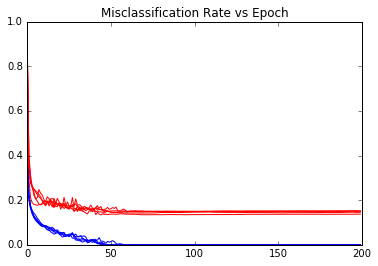

In [44]:
for res in results:
    plt.plot(res['class_test_per_epoch'], c='r')
    plt.plot(res['class_train_per_epoch'], c='b')
plt.title("Misclassification Rate vs Epoch")
plt.savefig('5b_misclassification_vs_epoch_200.png')

### Part c) Visualizing Parameters

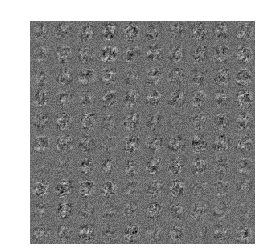

In [51]:
fig = nnbp.plot_100(results[0]['W1'])
fig.savefig('5c_parameter_viz.png')

### Part d) Learning Rate

In [52]:
results_rate = [nnbp.train_singlelayer(epochs=100, rate=r, seed=42)
                for r in [0.1, 0.5, 0.2, 0.01]]

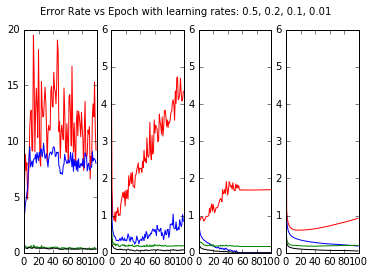

In [88]:
results_reordered = results_rate[1:3] + [results_rate[0]] + [results_rate[3]]
fig = plt.figure()
for n in range(4):
    ax = fig.add_subplot(1,4,n+1)
    ax.plot(results_reordered[n]['ce_test_per_epoch'], c='r')
    ax.plot(results_reordered[n]['ce_train_per_epoch'], c='b')
    ax.plot(results_reordered[n]['class_test_per_epoch'], c='g')
    ax.plot(results_reordered[n]['class_train_per_epoch'], c='k')
fig.suptitle("Error Rate vs Epoch with learning rates: 0.5, 0.2, 0.1, 0.01")
fig.savefig('learning_rates.png')

In [90]:
results_rate_tiny = nnbp.train_singlelayer(epochs=300, rate=0.001, momentum=0.0, seed=42)

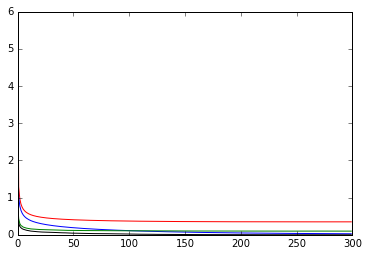

In [91]:

plt.plot(results_rate_tiny['ce_test_per_epoch'], c='r')
plt.plot(results_rate_tiny['ce_train_per_epoch'], c='b')
plt.plot(results_rate_tiny['class_test_per_epoch'], c='g')
plt.plot(results_rate_tiny['class_train_per_epoch'], c='k')

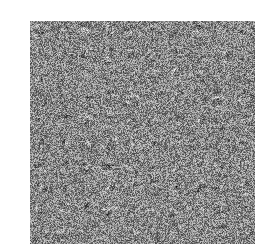

In [95]:
fig = nnbp.plot_100(results_rate_tiny['W1'])

In [84]:
results_momentum = [nnbp.train_singlelayer(epochs=100, rate=0.01, seed=42, momentum=m)
                    for m in [0.0, 0.5, 0.9]]

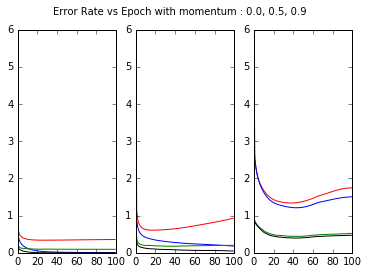

In [89]:
fig = plt.figure()
for n in range(3):
    ax = fig.add_subplot(1,3,n+1)
    ax.plot(results_momentum[n]['ce_test_per_epoch'], c='r')
    ax.plot(results_momentum[n]['ce_train_per_epoch'], c='b')
    ax.plot(results_momentum[n]['class_test_per_epoch'], c='g')
    ax.plot(results_momentum[n]['class_train_per_epoch'], c='k')
fig.suptitle("Error Rate vs Epoch with momentum : 0.0, 0.5, 0.9")
fig.savefig('momentum_tests.png')

In [87]:
results_momentum[0]['class_test_per_epoch'][-1]

0.092999999999999999

### e) Number of Hidden Units

In [138]:
results_hidden = [nnbp.train_singlelayer(epochs=100, rate = 0.01, momentum = 0.5, 
                                        n_hidden=h) for h in [20, 100, 200, 500]]

Min Classification Error (test): 0.180333333333
Min Classification Error (test): 0.176
Min Classification Error (test): 0.19
Min Classification Error (test): 0.211333333333


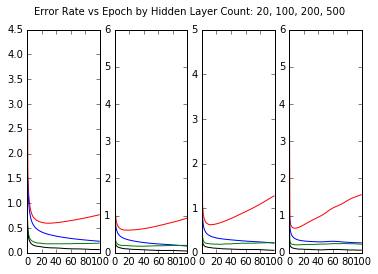

In [161]:
fig = plt.figure()
for n in range(4):
    ax = fig.add_subplot(1,4,n+1)
    ax.plot(results_hidden[n]['ce_test_per_epoch'], c='r')
    ax.plot(results_hidden[n]['ce_train_per_epoch'], c='b')
    ax.plot(results_hidden[n]['class_test_per_epoch'], c='g')
    ax.plot(results_hidden[n]['class_train_per_epoch'], c='k')
    print('Min Classification Error (test):', 
          min(results_hidden[n]['class_test_per_epoch']))
fig.suptitle("Error Rate vs Epoch by Hidden Layer Count: 20, 100, 200, 500")
fig.savefig('hidden_units.png')

### f) Dropout

In [146]:
dropout_result = nnbp.train_singlelayer_dropout(epochs=50, rate=0.05, dropout=0.5)

In [ ]:
plt.plot(dropout_result['ce_test_per_epoch'], c='r')
plt.plot(dropout_result['ce_train_per_epoch'], c='b')
plt.plot(dropout_result['class_test_per_epoch'], c='g')
plt.plot(dropout_result['class_train_per_epoch'], c='k')
plt.figsave('dropout1.png')

In [156]:
min(dropout_result['class_test_per_epoch'])

0.10033333333333333

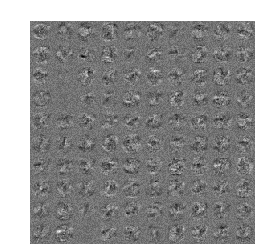

In [152]:
fig = nnbp.plot_100(dropout_result['W1'])

In [ ]:
results_hidden_dropout = [nnbp.train_singlelayer(epochs=100, rate = 0.05, momentum = 0, 
                                        n_hidden=h, dropout=0.5) for h in [20, 100, 200, 500]]

### g) Best Single-Layer Network

In [141]:
best_set = nnbp.train_singlelayer(epochs=30, rate=0.05, momentum=0.0, validation=True)

In [ ]:
plt.plot(best_set_2layer['ce_test_per_epoch'], c='r')
plt.plot(best_set_2layer['ce_train_per_epoch'], c='b')
plt.plot(best_set_2layer['class_test_per_epoch'], c='g')
plt.plot(best_set_2layer['class_train_per_epoch'], c='k')
print('Min Classification Error (test):', 
          min(best_set_2layer['class_test_per_epoch']))
fig.suptitle("Best 2-Layer Result: Validation Error Rate vs Epoch with momentum=0.0, Rate: .05")
fig.savefig("one_layer_best.png")

In [ ]:
fig = nnbp.plot_100(best_set['W1'])
print('Min validation error:', np.min(best_set['class_test_per_epoch']))
fig.savefig('one_layer_best_features.png')

In [ ]:
results_multi_range = [nnbp.train_singlelayer(epochs=100, rate=r, momentum=m)
                       for m in [0.0, 0.2, 0.5]
                       for r in [0.1, 0.05, 0.01]]

### h) Multiple Layers

In [105]:
results_multi = nnbp.train_twolayer(epochs=300, rate=0.01, seed=42)

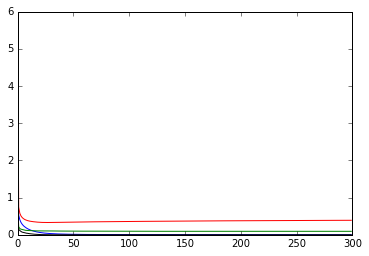

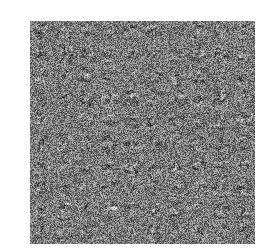

In [106]:
results_multi

plt.plot(results_multi['ce_test_per_epoch'], c='r')
plt.plot(results_multi['ce_train_per_epoch'], c='b')
plt.plot(results_multi['class_test_per_epoch'], c='g')
plt.plot(results_multi['class_train_per_epoch'], c='k')
fig = nnbp.plot_100(results_multi['W1'])

In [107]:
results_multi_range = [nnbp.train_twolayer(epochs=200, rate=r, momentum=m)
                       for m in [0.0, 0.2, 0.5]
                       for r in [0.1, 0.05, 0.01]]

In [118]:
parameters = [(m, r)   for m in [0.0, 0.2, 0.5]
                       for r in [0.1, 0.05, 0.01]]
parameters

[(0.0, 0.1),
 (0.0, 0.05),
 (0.0, 0.01),
 (0.2, 0.1),
 (0.2, 0.05),
 (0.2, 0.01),
 (0.5, 0.1),
 (0.5, 0.05),
 (0.5, 0.01)]

Min Classification Error (test): 0.333
Min Classification Error (test): 0.089
Min Classification Error (test): 0.094


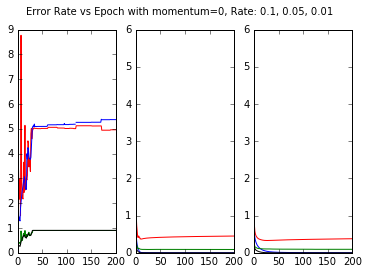

In [164]:
fig = plt.figure()
for n in range(3):
    ax = fig.add_subplot(1,3,n+1)
    ax.plot(results_multi_range[n]['ce_test_per_epoch'], c='r')
    ax.plot(results_multi_range[n]['ce_train_per_epoch'], c='b')
    ax.plot(results_multi_range[n]['class_test_per_epoch'], c='g')
    ax.plot(results_multi_range[n]['class_train_per_epoch'], c='k')
    print('Min Classification Error (test):', 
          min(results_multi_range[n]['class_test_per_epoch']))
fig.suptitle("Error Rate vs Epoch with momentum=0, Rate: 0.1, 0.05, 0.01")
fig.savefig('momentum0_rate10501.png')

Min Classification Error (test): 0.148
Min Classification Error (test): 0.106
Min Classification Error (test): 0.122


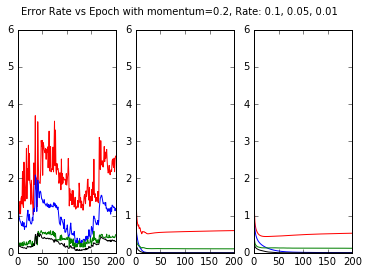

In [165]:
fig = plt.figure()
for n in range(3,6):
    ax = fig.add_subplot(1,3,n+-2)
    ax.plot(results_multi_range[n]['ce_test_per_epoch'], c='r')
    ax.plot(results_multi_range[n]['ce_train_per_epoch'], c='b')
    ax.plot(results_multi_range[n]['class_test_per_epoch'], c='g')
    ax.plot(results_multi_range[n]['class_train_per_epoch'], c='k')
    print('Min Classification Error (test):', 
          min(results_multi_range[n]['class_test_per_epoch']))    
fig.suptitle("Error Rate vs Epoch with momentum=0.2, Rate: 0.1, 0.05, 0.01")
fig.savefig('momentum2_rate10501.png')

Min Classification Error (test): 0.508
Min Classification Error (test): 0.288333333333
Min Classification Error (test): 0.301


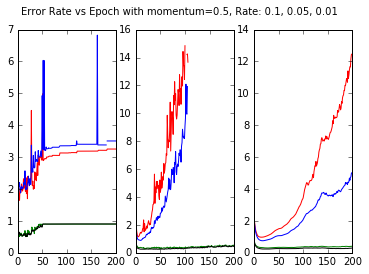

In [163]:
fig = plt.figure()
for n in range(6,9):
    ax = fig.add_subplot(1,3,n+-5)
    ax.plot(results_multi_range[n]['ce_test_per_epoch'], c='r')
    ax.plot(results_multi_range[n]['ce_train_per_epoch'], c='b')
    ax.plot(results_multi_range[n]['class_test_per_epoch'], c='g')
    ax.plot(results_multi_range[n]['class_train_per_epoch'], c='k')
    print('Min Classification Error (test):', 
          min(results_multi_range[n]['class_test_per_epoch']))
fig.suptitle("Error Rate vs Epoch with momentum=0.5, Rate: 0.1, 0.05, 0.01")
fig.savefig('momentum5_rate10501.png')

In [ ]:
best_set_2layer_dropout = nnbp.train_twolayer(epochs=30, rate=0.05, momentum=0.0, 
                                              validation=True, dropout=0.5)

In [167]:
best_set_2layer = nnbp.train_twolayer(epochs=30, rate=0.05, momentum=0.0, validation=True)

Min Classification Error (test): 0.079


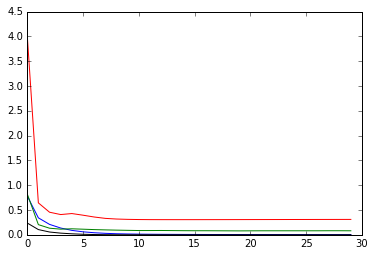

In [166]:
plt.plot(best_set_2layer['ce_test_per_epoch'], c='r')
plt.plot(best_set_2layer['ce_train_per_epoch'], c='b')
plt.plot(best_set_2layer['class_test_per_epoch'], c='g')
plt.plot(best_set_2layer['class_train_per_epoch'], c='k')
print('Min Classification Error (test):', 
          min(best_set_2layer['class_test_per_epoch']))
fig.suptitle("Best 2-Layer Result: Validation Error Rate vs Epoch with momentum=0.0, Rate: .05")
fig.savefig("two_layer_best.png")

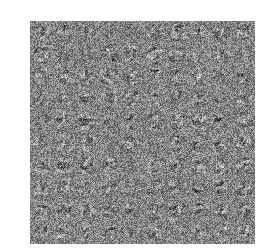

Min validation error: 0.079


In [159]:
fig = nnbp.plot_100(best_set['W1'])
print('Min validation error:', np.min(best_set['class_test_per_epoch']))
fig.savefig('two_layer_best_features.png')ac